# **Create a Data Frame called 'data_base'**

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

wd = os.getcwd() #working directory

/var/folders/hj/ry93t89j01x04m0n6y3x9zrw0000gn/T/ipykernel_20848/2137734168.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
fname_txt = 'ConjunctionData.mat'
fpath_txt = os.path.join(wd, fname_txt)

mat_data = loadmat(fpath_txt)
# Check the keys of the loaded .mat file
#print(mat_data.keys())

variable_names = ['ConjDatenum', 'L', 'MLT', 'Poes90Flux','Poes90PA','Poes0Flux','Poes0PA','C', 'N','AE',
                  "AEsub0","AEsub1","AEsub2","AEsub3",
                  "AEsub4","AEsub5","AEsub6","AEsub7","AEsub8","AEsub9","AEsub10","AEsub11",
                  "AEsub12","AEsub13","AEsub14","AEsub15","AEsub16","AEsub17","AEsub18",
                  "AEsub19","AEsub20","AEsub21","AEsub22","AEsub23","AEsub24","AEsub25",
                  "AEsub26","AEsub27","AEsub28","AEsub29","AEsub30","AEsub31","AEsub32",
                  "AEsub33","AEsub34","AEsub35"]


df_list= []
# Convert to pandas DataFrame
for var in variable_names:
    if var in mat_data:  # Check if the variable exists in the .mat file
        data = mat_data[var]
        df_list.append(pd.DataFrame(data, columns=[var]))  # Add variable data as a new column
        print(f"Converted {var} to DataFrame")
    else:
        print(f"{var} not found in the .mat file")

data_base = pd.concat(df_list, axis=1)
data_base["log_flux0"] = np.log10(data_base["Poes0Flux"])
data_base["log_flux90"] = np.log10(data_base["Poes90Flux"])
data_base.replace([np.inf, -np.inf], np.nan, inplace=True)
#drop every row where a NaN, inf exists: see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
data_base.dropna(axis=0, inplace=True)

data_base

Converted ConjDatenum to DataFrame
Converted L to DataFrame
Converted MLT to DataFrame
Converted Poes90Flux to DataFrame
Converted Poes90PA to DataFrame
Converted Poes0Flux to DataFrame
Converted Poes0PA to DataFrame
Converted C to DataFrame
Converted N to DataFrame
Converted AE to DataFrame
Converted AEsub0 to DataFrame
Converted AEsub1 to DataFrame
Converted AEsub2 to DataFrame
Converted AEsub3 to DataFrame
Converted AEsub4 to DataFrame
Converted AEsub5 to DataFrame
Converted AEsub6 to DataFrame
Converted AEsub7 to DataFrame
Converted AEsub8 to DataFrame
Converted AEsub9 to DataFrame
Converted AEsub10 to DataFrame
Converted AEsub11 to DataFrame
Converted AEsub12 to DataFrame
Converted AEsub13 to DataFrame
Converted AEsub14 to DataFrame
Converted AEsub15 to DataFrame
Converted AEsub16 to DataFrame
Converted AEsub17 to DataFrame
Converted AEsub18 to DataFrame
Converted AEsub19 to DataFrame
Converted AEsub20 to DataFrame
Converted AEsub21 to DataFrame
Converted AEsub22 to DataFrame
Conv

,ConjDatenum,L,MLT,Poes90Flux,Poes90PA,Poes0Flux,Poes0PA,C,N,AE,...,AEsub28,AEsub29,AEsub30,AEsub31,AEsub32,AEsub33,AEsub34,AEsub35,log_flux0,log_flux90
0,735447.149318,6.278001,20.161642,47701.613281,2.733900,241.935486,0.604650,6.437361,1.805451,265,...,106,111,113,96,83,82,88,92,2.383700,4.678533
1,735447.149364,6.392297,20.154249,52862.902344,2.658825,161.290314,0.581789,6.452659,1.850225,265,...,106,111,113,96,83,82,88,92,2.207608,4.723151
2,735447.433507,5.554937,19.434353,58024.191406,3.406173,80.645157,0.685807,6.507958,2.070526,127,...,125,130,123,142,156,150,132,110,1.906578,4.763609
3,735447.433530,5.602855,19.427072,65766.125000,3.362095,322.580627,0.671470,6.463046,1.806923,127,...,125,130,123,142,156,150,132,110,2.508638,4.818002
4,735447.433553,5.652709,19.419813,72862.906250,3.318826,80.645157,0.658039,6.505795,2.029778,127,...,125,130,123,142,156,150,132,110,1.906578,4.862506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18413,737119.748776,2.838628,9.615955,31572.580078,169.938719,161.290314,175.914358,7.521133,4.347524,124,...,155,148,182,185,186,198,183,167,2.207608,4.499310
18414,737119.748799,2.853086,9.618258,31572.580078,170.019514,80.645157,175.963165,7.545504,4.525492,124,...,155,148,182,185,186,198,183,167,1.906578,4.499310
18415,737119.748822,2.868777,9.620536,36411.289062,170.100833,80.645157,176.011635,7.543415,4.482647,124,...,155,148,182,185,186,198,183,167,1.906578,4.561236
18416,737119.748845,2.883683,9.622787,40282.257812,170.180498,161.290314,176.059442,7.517479,4.251090,124,...,155,148,182,185,186,198,183,167,2.207608,4.605114


In [4]:
data_training = data_base.iloc[579:14973,:]
data_validation = data_base.iloc[14973:,:]

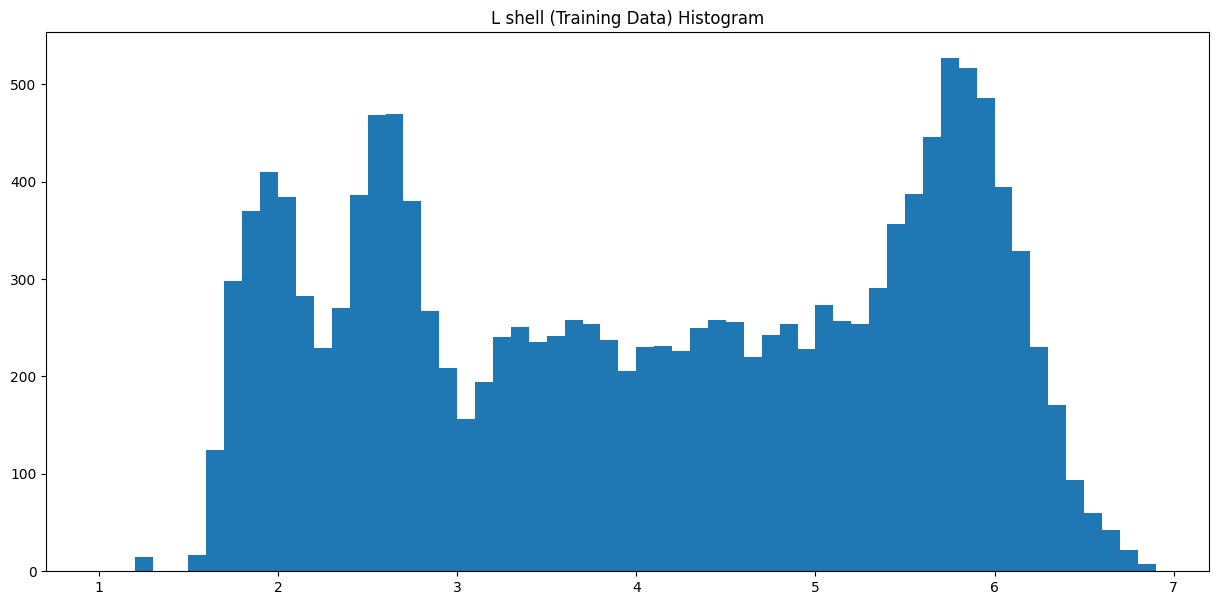

In [5]:
# Creating plot to show the spread in L shell (trying to identify weaknesses in the training data)
fig = plt.figure(figsize =(15, 7))
plt.hist(data_training["L"].values, bins=np.arange(1,7,0.1))
plt.title("L shell (Training Data) Histogram")
plt.show()

# **Establish Train and Test data**
Create arrays: X_data(inputs), y_data(outputs)

In [5]:
# Create 5 different dataframes for 5 different model (runs)
# 1. POES90, L, MLT
# 2. POES90, L, MLT, AE
# 3. POES90, POES0, L, MLT
# 4. POES90, POES0, L, MLT, AE
# 5. POES90, POES0, L, MLT, AE, AEts


X_data1 = data_training[["log_flux90","L","MLT"]].values
X_data2 = data_training[["log_flux90","L","MLT", "AEsub0"]].values
X_data3 = data_training[["log_flux90","log_flux0","L","MLT"]].values
X_data4 = data_training[["log_flux90","log_flux0","L","MLT", "AEsub0"]].values
X_data5 = data_training[["log_flux90", "log_flux0","L","MLT","AEsub0","AEsub1","AEsub2","AEsub3",
                  "AEsub4","AEsub5","AEsub6","AEsub7","AEsub8","AEsub9","AEsub10","AEsub11",
                  "AEsub12","AEsub13","AEsub14","AEsub15","AEsub16","AEsub17","AEsub18",
                  "AEsub19","AEsub20","AEsub21","AEsub22","AEsub23","AEsub24","AEsub25",
                  "AEsub26","AEsub27","AEsub28","AEsub29","AEsub30","AEsub31","AEsub32",
                  "AEsub33","AEsub34","AEsub35"]].values

y_data=data_training[["C","N"]].values

test_size = 0.3

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_data1, y_data, test_size=test_size, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data2, y_data, test_size=test_size, random_state=0)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_data3, y_data, test_size=test_size, random_state=0)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_data4, y_data, test_size=test_size, random_state=0)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_data5, y_data, test_size=test_size, random_state=0)
# use the random_state argument to make sure results are deterministic


# **Complete GridSearchCV  and Train MLPRegressor**

## CSVGridSearch1
## Build and train a the MLP Model with cross validation

In [6]:
scalerX1 = StandardScaler().fit(X_train1)
X_train1 = scalerX1.transform(X_train1)
X_test1 = scalerX1.transform(X_test1)

regr_ann1 = MLPRegressor(random_state = 0, solver='sgd', activation='relu',max_iter=1000,learning_rate_init= 0.001,
                        learning_rate = 'adaptive',hidden_layer_sizes = (15,15)) # random_state argument to make results deterministic

#instead of training the model as-is, let's use GridSearchCV to:
# 1) explore different hyperparameter - in particular, hidden layer sizes
# 2) perform cross validation
# resource: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

#MLPRegressor has two hidden layers, so their size is specified using an array of length 2 via the hidden_layer_sizes parameter
hidden_layer_sizes_hyperspace = [(10,10), (50,50), (90,90), (100,100)]
activation_hyperspace = ['relu', 'tanh']
solver_hyperspace = ['sgd', 'adam']

grid = GridSearchCV(estimator = regr_ann1,
                    param_grid = {'hidden_layer_sizes': hidden_layer_sizes_hyperspace, 'activation': activation_hyperspace,
                                  'solver':solver_hyperspace},
                    cv = 3, verbose = 2)


grid.fit(X_train1,y_train1) #start the grid search process
y_pred_ann1 = grid.predict(X_test1) #automatically uses the best cross validation result and optimal hyperparameters

#look at the cross validation results:
# use pandas to generate dataframes from dictionaries
df = pd.DataFrame.from_dict(grid.cv_results_)
display(df)

#the columns 'split0_test_score, split1_test_score, etc.' are the different K folds of the CV process
#the rows are different hyperspace parameters

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   1.2s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   1.3s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   2.9s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   2.4s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   3.1s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=adam; total time=   2.2s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=adam; total t

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.640577,0.070399,0.001022,0.000312,relu,"(10, 10)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.831822,0.859067,0.854262,0.848384,0.011874,16
1,1.147037,0.195865,0.000614,0.000025,relu,"(10, 10)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.853143,0.881158,0.881216,0.871839,0.013220,12
2,2.814226,0.303927,0.003555,0.000845,relu,"(50, 50)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.857438,0.881373,0.882661,0.873824,0.011599,10
3,3.138092,1.608988,0.002079,0.000651,relu,"(50, 50)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.867517,0.888837,0.901975,0.886110,0.014199,6
4,4.464120,0.803955,0.004187,0.001438,relu,"(90, 90)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.858430,0.883425,0.880486,0.874114,0.011155,9
5,6.850227,0.477384,0.003333,0.000588,relu,"(90, 90)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.889119,0.910950,0.909343,0.903138,0.009934,1
6,4.778627,0.349611,0.002928,0.000228,relu,"(100, 100)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.860474,0.882562,0.884195,0.875744,0.010818,7
7,5.421137,2.152703,0.003258,0.000540,relu,"(100, 100)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.864981,0.891016,0.908090,0.888029,0.017726,5
8,1.050912,0.039544,0.000771,0.000021,tanh,"(10, 10)",sgd,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.845329,0.868818,0.870093,0.861414,0.011385,15
9,1.420822,0.420592,0.000783,0.000054,tanh,"(10, 10)",adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.858146,0.889984,0.879045,0.875725,0.013208,8


## CSVGridSearch2
## Build and train a the MLP Model with cross validation

In [7]:
scalerX2 = StandardScaler().fit(X_train2)
X_train2 = scalerX2.transform(X_train2)
X_test2 = scalerX2.transform(X_test2)

regr_ann2 = MLPRegressor(random_state = 0, solver='sgd', activation='relu',max_iter=1000,learning_rate_init= 0.001,
                        learning_rate = 'adaptive',hidden_layer_sizes = (15,15),verbose=False ) # random_state argument to make results deterministic

#MLPRegressor has two hidden layers, so their size is specified using an array of length 2 via the hidden_layer_sizes parameter
grid2 = GridSearchCV(estimator = regr_ann2,
                    param_grid = {'hidden_layer_sizes': hidden_layer_sizes_hyperspace, 'activation': activation_hyperspace,
                                  'solver':solver_hyperspace},
                    cv = 3, verbose = 2)

grid2.fit(X_train2,y_train2) #start the grid search process
y_pred_ann2 = grid2.predict(X_test2) #automatically uses the best cross validation result and optimal hyperparameters

#look at the cross validation results:
# use pandas to generate dataframes from dictionaries
df2 = pd.DataFrame.from_dict(grid2.cv_results_)
display(df2)

#the columns 'split0_test_score, split1_test_score, etc.' are the different K folds of the CV process
#the rows are different hyperspace parameters

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   2.8s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   2.6s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   2.6s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=adam; total time=   1.9s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=adam; total t

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.741598,0.122929,0.000633,0.000042,relu,"(10, 10)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.847655,0.867209,0.863006,0.859290,0.008404,16
1,0.847793,0.070814,0.000594,0.000035,relu,"(10, 10)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.857241,0.872128,0.873986,0.867785,0.007494,15
2,2.673966,0.116446,0.001913,0.000566,relu,"(50, 50)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.860140,0.881032,0.882532,0.874568,0.010221,12
3,3.913648,1.407249,0.001459,0.000057,relu,"(50, 50)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.868414,0.903713,0.905258,0.892462,0.017016,6
4,4.913617,0.514885,0.002666,0.000172,relu,"(90, 90)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.861873,0.884042,0.887214,0.877710,0.011273,9
5,7.345275,1.442550,0.003052,0.000725,relu,"(90, 90)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.889676,0.918151,0.910518,0.906115,0.012034,2
6,5.365388,0.895675,0.003033,0.000453,relu,"(100, 100)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.863265,0.887960,0.884279,0.878501,0.010878,8
7,8.427459,0.376103,0.003692,0.000755,relu,"(100, 100)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.892440,0.908172,0.917519,0.906044,0.010349,3
8,0.822317,0.083042,0.000761,0.000008,tanh,"(10, 10)",sgd,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.859542,0.874721,0.875203,0.869822,0.007272,14
9,1.599929,0.225099,0.000773,0.000011,tanh,"(10, 10)",adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.876165,0.895037,0.890737,0.887313,0.008076,7


## CSVGridSearch3
## Build and train a the MLP Model with cross validation

In [8]:


scalerX3 = StandardScaler().fit(X_train3)
X_train3 = scalerX3.transform(X_train3)
X_test3 = scalerX3.transform(X_test3)

regr_ann3 = MLPRegressor(random_state = 0, solver='sgd', activation='relu',max_iter=1000,learning_rate_init= 0.001,
                        learning_rate = 'adaptive',hidden_layer_sizes = (15,15),verbose=False ) # random_state argument to make results deterministic



grid3 = GridSearchCV(estimator = regr_ann3,
                    param_grid = {'hidden_layer_sizes': hidden_layer_sizes_hyperspace, 'activation': activation_hyperspace,
                                  'solver':solver_hyperspace},
                    cv = 3, verbose = 2)

grid3.fit(X_train3,y_train3) #start the grid search process
y_pred_ann3 = grid3.predict(X_test3) #automatically uses the best cross validation result and optimal hyperparameters

#look at the cross validation results:
# use pandas to generate dataframes from dictionaries
df3 = pd.DataFrame.from_dict(grid3.cv_results_)
display(df3)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   1.0s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   1.3s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   1.2s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   4.2s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   3.4s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   3.8s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=adam; total time=   3.0s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=adam; total t

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.665106,0.058959,0.000613,0.000036,relu,"(10, 10)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.861762,0.877637,0.875928,0.871776,0.007115,16
1,1.159914,0.115622,0.000629,0.000041,relu,"(10, 10)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.873955,0.895718,0.888516,0.886063,0.009053,13
2,3.794532,0.305601,0.001944,0.000637,relu,"(50, 50)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.885210,0.896933,0.898791,0.893644,0.006012,7
3,3.312308,0.266679,0.002143,0.000267,relu,"(50, 50)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.903101,0.914088,0.910502,0.909230,0.004575,3
4,4.680297,0.371959,0.002891,0.000444,relu,"(90, 90)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.885274,0.895087,0.898900,0.893087,0.005740,8
5,5.748509,1.170508,0.005869,0.004436,relu,"(90, 90)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.911567,0.923354,0.913268,0.916063,0.005202,1
6,5.126312,0.290984,0.002630,0.000100,relu,"(100, 100)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.884268,0.896430,0.897141,0.892613,0.005908,9
7,5.941461,1.747256,0.003226,0.000663,relu,"(100, 100)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.901118,0.918399,0.917573,0.912363,0.007959,2
8,0.682459,0.035644,0.000756,0.000042,tanh,"(10, 10)",sgd,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.871721,0.878552,0.881163,0.877145,0.003981,15
9,1.045464,0.043836,0.000748,0.000035,tanh,"(10, 10)",adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.885899,0.894344,0.889378,0.889873,0.003466,10


## CSVGridSearch4
## Build and train a the MLP Model with cross validation

In [9]:
scalerX4 = StandardScaler().fit(X_train4)
X_train4 = scalerX4.transform(X_train4)
X_test4 = scalerX4.transform(X_test4)

regr_ann4 = MLPRegressor(random_state = 0, solver='sgd', activation='relu',max_iter=1000,learning_rate_init= 0.001,
                        learning_rate = 'adaptive',hidden_layer_sizes = (15,15),verbose=False ) # random_state argument to make results deterministic



grid4 = GridSearchCV(estimator = regr_ann4,
                    param_grid = {'hidden_layer_sizes': hidden_layer_sizes_hyperspace, 'activation': activation_hyperspace,
                                  'solver':solver_hyperspace},
                    cv = 3, verbose = 2)

grid4.fit(X_train4,y_train4) #start the grid search process
y_pred_ann4 = grid4.predict(X_test4) #automatically uses the best cross validation result and optimal hyperparameters

#look at the cross validation results:
# use pandas to generate dataframes from dictionaries
df4 = pd.DataFrame.from_dict(grid4.cv_results_)
display(df4)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   1.1s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   2.7s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   2.9s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   2.8s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=adam; total time=   2.7s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=adam; total t

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.864526,0.024052,0.000593,0.000014,relu,"(10, 10)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.870900,0.885257,0.882078,0.879412,0.006157,15
1,0.941016,0.124693,0.000569,0.000031,relu,"(10, 10)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.882348,0.887418,0.885984,0.885250,0.002134,13
2,2.783795,0.109630,0.001590,0.000173,relu,"(50, 50)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.882599,0.897267,0.896005,0.891957,0.006637,9
3,2.668028,0.792269,0.001514,0.000167,relu,"(50, 50)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.905331,0.906169,0.913358,0.908286,0.003603,4
4,22.358643,24.085979,0.002528,0.000380,relu,"(90, 90)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.892029,0.900634,0.902589,0.898417,0.004587,7
5,48.778585,47.418484,0.003161,0.000794,relu,"(90, 90)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.913019,0.911286,0.918290,0.914198,0.002979,2
6,161.998537,220.951025,0.002562,0.000102,relu,"(100, 100)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.887826,0.900447,0.901276,0.896516,0.006154,8
7,14.605545,12.578210,0.002970,0.000415,relu,"(100, 100)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.913113,0.915538,0.916192,0.914947,0.001325,1
8,0.781610,0.029944,0.000738,0.000030,tanh,"(10, 10)",sgd,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.870125,0.884986,0.877597,0.877569,0.006067,16
9,11.436016,14.779775,0.002450,0.002386,tanh,"(10, 10)",adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.879575,0.886407,0.887587,0.884523,0.003532,14


## CSVGridSearch5
## Build and train a the MLP Model with cross validation

In [10]:
scalerX5 = StandardScaler().fit(X_train5)
X_train5 = scalerX5.transform(X_train5)
X_test5 = scalerX5.transform(X_test5)

regr_ann5 = MLPRegressor(random_state = 0, solver='sgd', activation='relu',max_iter=1000,learning_rate_init= 0.001,
                        learning_rate = 'adaptive',hidden_layer_sizes = (15,15),verbose=False ) # random_state argument to make results deterministic



grid5 = GridSearchCV(estimator = regr_ann5,
                    param_grid = {'hidden_layer_sizes': hidden_layer_sizes_hyperspace, 'activation': activation_hyperspace,
                                  'solver':solver_hyperspace},
                    cv = 3, verbose = 2)

grid5.fit(X_train5,y_train5) #start the grid search process
y_pred_ann5 = grid5.predict(X_test5) #automatically uses the best cross validation result and optimal hyperparameters

#look at the cross validation results:
# use pandas to generate dataframes from dictionaries
df5 = pd.DataFrame.from_dict(grid5.cv_results_)
display(df5)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   1.1s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   1.1s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=sgd; total time=   1.2s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   1.3s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=(10, 10), solver=adam; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   5.0s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   4.4s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=sgd; total time=   5.2s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=adam; total time=   5.7s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), solver=adam; total t

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.151791,0.047618,0.000693,0.000029,relu,"(10, 10)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.869678,0.883751,0.885096,0.879509,0.006973,16
1,1.373836,0.059726,0.000643,0.000049,relu,"(10, 10)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.872499,0.896990,0.893389,0.887626,0.010797,14
2,4.860763,0.355356,0.001992,0.000538,relu,"(50, 50)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.884354,0.892307,0.896487,0.891049,0.005032,13
3,6.518294,0.751423,0.002358,0.000512,relu,"(50, 50)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.903440,0.926944,0.935478,0.921954,0.013547,6
4,8.112632,0.758866,0.006059,0.003953,relu,"(90, 90)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.897827,0.905188,0.907429,0.903482,0.004102,8
5,5.216168,1.082934,0.003039,0.000424,relu,"(90, 90)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.916435,0.937834,0.936157,0.930142,0.009716,3
6,11.170931,1.828199,0.006690,0.004723,relu,"(100, 100)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.903570,0.904826,0.913104,0.907167,0.004230,7
7,5.626976,0.343977,0.002718,0.000019,relu,"(100, 100)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.932782,0.933452,0.936261,0.934165,0.001507,1
8,1.166965,0.024688,0.000864,0.000038,tanh,"(10, 10)",sgd,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.874729,0.886731,0.887366,0.882942,0.005813,15
9,1.437533,0.089097,0.000857,0.000097,tanh,"(10, 10)",adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.895555,0.898113,0.899800,0.897822,0.001745,10


## Results of CSVGridSearch

In [18]:
#look at the cross validation results:

print(grid.best_params_)
print(grid.best_score_)

print(grid2.best_params_)
print(grid2.best_score_)

print(grid3.best_params_)
print(grid3.best_score_)

print(grid4.best_params_)
print(grid4.best_score_)

print(grid5.best_params_)
print(grid5.best_score_)

# use pandas to generate dataframes from dictionaries
pd.DataFrame.from_dict(y_pred_ann5)

from sklearn import metrics
print('R2: ' ,metrics.r2_score(y_test5, y_pred_ann5))
print('R2: ' ,metrics.r2_score(y_train5, grid5.predict(X_train5)))

# Metrics for validation partition 
# X_data_validation = data_validation[["log_flux90", "log_flux0","L","MLT","AEsub0","AEsub1","AEsub2","AEsub3",
#                   "AEsub4","AEsub5","AEsub6","AEsub7","AEsub8","AEsub9","AEsub10","AEsub11",
#                   "AEsub12","AEsub13","AEsub14","AEsub15","AEsub16","AEsub17","AEsub18",
#                   "AEsub19","AEsub20","AEsub21","AEsub22","AEsub23","AEsub24","AEsub25",
#                   "AEsub26","AEsub27","AEsub28","AEsub29","AEsub30","AEsub31","AEsub32",
#                   "AEsub33","AEsub34","AEsub35"]].values
# y_pred_val = grid5.predict(scalerX5.transform(X_data_validation))
# Save y_pred_val for the predicted C and N coefficients 

{'activation': 'relu', 'hidden_layer_sizes': (90, 90), 'solver': 'adam'}
0.9031375397333462
{'activation': 'tanh', 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}
0.9073995734389579
{'activation': 'relu', 'hidden_layer_sizes': (90, 90), 'solver': 'adam'}
0.9160628841557891
{'activation': 'relu', 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}
0.914947299951784
{'activation': 'relu', 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}
0.9341647617818426
R2:  0.9458475801609011
R2:  0.9626989169644078


# **Out of Sample Testing**
## Loading POES data for May 2017 - Mar 2018 (2sec cadence), NOT conjunction based

In [12]:
poes_name_txt = ('POES20172018.mat')
poes_path_txt = os.path.join(wd, poes_name_txt)
poes_mat  = loadmat(poes_path_txt)

val_names = ['L_runninglist', 'MLT_runninglist', 'Flux90_runninglist','Flux0_runninglist',
                  "AEsub0","AEsub1","AEsub2","AEsub3",
                  "AEsub4","AEsub5","AEsub6","AEsub7","AEsub8","AEsub9","AEsub10","AEsub11",
                  "AEsub12","AEsub13","AEsub14","AEsub15","AEsub16","AEsub17","AEsub18",
                  "AEsub19","AEsub20","AEsub21","AEsub22","AEsub23","AEsub24","AEsub25",
                  "AEsub26","AEsub27","AEsub28","AEsub29","AEsub30","AEsub31","AEsub32",
                  "AEsub33","AEsub34","AEsub35", "Datenum_runninglist"]


val_list= []
# Convert to pandas DataFrame
# Assuming the data is a 2D array or can be reshaped accordingly
#df = pd.DataFrame(data)
for var in val_names:
    if var in poes_mat:  # Check if the variable exists in the .mat file
        poes_data = poes_mat[var]
        if poes_data.shape[1] == 4:
          val_list.append(pd.DataFrame(poes_data, columns=[f"{var}_1", f"{var}_2", f"{var}_3", f"{var}_4"]))
          print(f"Converted 4 {var} to DataFrame")
        else:
          val_list.append(pd.DataFrame(poes_data, columns=[var]))  # Add variable data as a new column
          print(f"Converted {var} to DataFrame")
    else:
        print(f"{var} not found in the .mat file")

poes_base = pd.concat(val_list, axis=1)
poes_base["log_flux0"] = np.log10(poes_base["Flux0_runninglist_1"]) # Plus 1 to avoid inf
poes_base["log_flux90"] = np.log10(poes_base["Flux90_runninglist_1"]) # Plus 1 to avoid inf
poes_base["L"] = (poes_base["L_runninglist"])
poes_base["MLT"] = (poes_base["MLT_runninglist"])

poes_base.replace([np.inf, -np.inf], np.nan, inplace=True)
#drop every row where a NaN, inf exists: see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
#data_base = data_base.dropna(axis=0) #without the inplace=True this command makes a copy of the data_base and therefore needs to be resaved
poes_base.dropna(axis=0, inplace=True)

X_poes=poes_base[["log_flux0", "log_flux90","L","MLT","AEsub0","AEsub1","AEsub2","AEsub3",
                  "AEsub4","AEsub5","AEsub6","AEsub7","AEsub8","AEsub9","AEsub10","AEsub11",
                  "AEsub12","AEsub13","AEsub14","AEsub15","AEsub16","AEsub17","AEsub18",
                  "AEsub19","AEsub20","AEsub21","AEsub22","AEsub23","AEsub24","AEsub25",
                  "AEsub26","AEsub27","AEsub28","AEsub29","AEsub30","AEsub31","AEsub32",
                  "AEsub33","AEsub34","AEsub35"]].values
                  
#y_pred_poes = grid5.predict(scalerX5.transform(X_poes))
#Save y_pred_poes for the predicted C and N coefficients 

Converted L_runninglist to DataFrame
Converted MLT_runninglist to DataFrame
Converted 4 Flux90_runninglist to DataFrame
Converted 4 Flux0_runninglist to DataFrame
Converted AEsub0 to DataFrame
Converted AEsub1 to DataFrame
Converted AEsub2 to DataFrame
Converted AEsub3 to DataFrame
Converted AEsub4 to DataFrame
Converted AEsub5 to DataFrame
Converted AEsub6 to DataFrame
Converted AEsub7 to DataFrame
Converted AEsub8 to DataFrame
Converted AEsub9 to DataFrame
Converted AEsub10 to DataFrame
Converted AEsub11 to DataFrame
Converted AEsub12 to DataFrame
Converted AEsub13 to DataFrame
Converted AEsub14 to DataFrame
Converted AEsub15 to DataFrame
Converted AEsub16 to DataFrame
Converted AEsub17 to DataFrame
Converted AEsub18 to DataFrame
Converted AEsub19 to DataFrame
Converted AEsub20 to DataFrame
Converted AEsub21 to DataFrame
Converted AEsub22 to DataFrame
Converted AEsub23 to DataFrame
Converted AEsub24 to DataFrame
Converted AEsub25 to DataFrame
Converted AEsub26 to DataFrame
Converted 

# Error Plots (i.e. REC Curve, Model Fits)


In [13]:
#REC Curve
def rec(m,n,tol):
  if type(m)!='numpy.ndarray':
    m=np.array(m)
  if type(n)!='numpy.ndarray':
    n=np.array(n)
  l=m.size
  percent = 0
  for i in range(l):
    if np.abs((m[i]-n[i])/n[i])<=tol:
      percent+=1
  return 100*(percent/l)

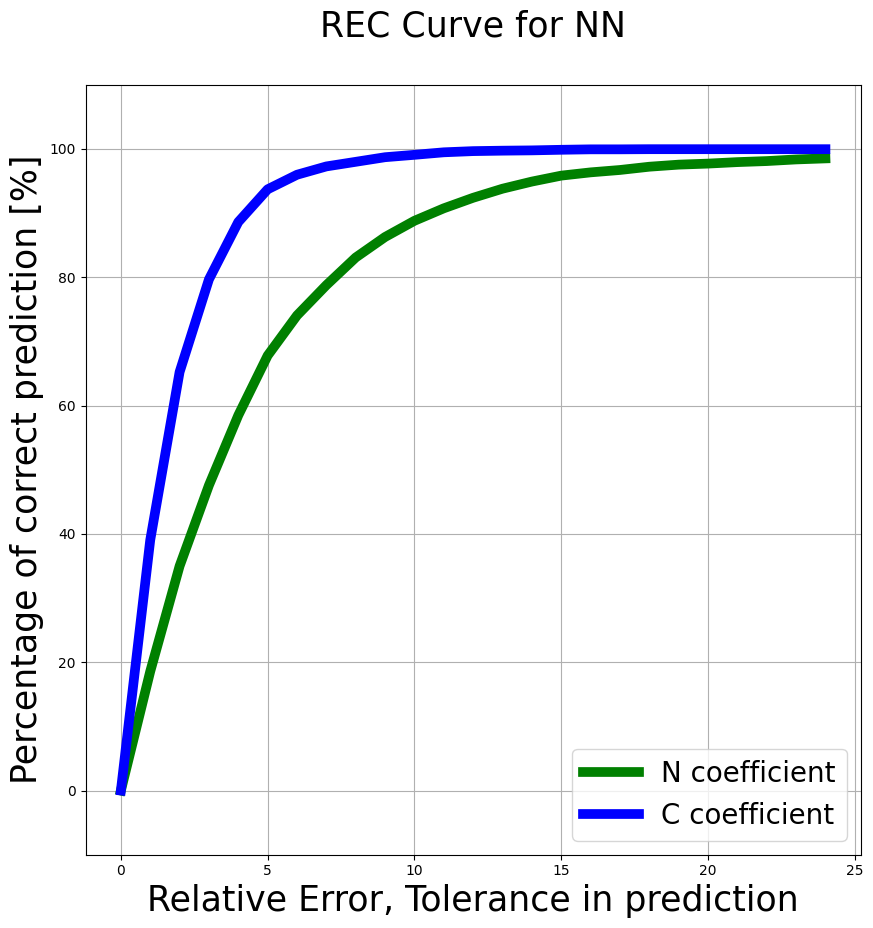

In [14]:
tol_max = 25
rec_SVR = []
rec2_SVR = []

for i in range(tol_max):
  rec_SVR.append(rec(y_pred_ann5[:,1], y_test5[:,1],0.01*i))
  rec2_SVR.append(rec(y_pred_ann5[:,0], y_test5[:,0],0.01*i))

plt.figure(figsize=(10,10))
plt.title('REC Curve for NN\n', fontsize = 25)
plt.xlabel('Relative Error, Tolerance in prediction',fontsize = 25)
plt.ylabel('Percentage of correct prediction [%]',fontsize = 25)
plt.ylim(-10,110)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max), rec_SVR, 'g', label='N coefficient' ,linewidth=7.0)
plt.plot(range(tol_max), rec2_SVR, 'b',label='C coefficient',linewidth=7.0)
plt.legend(fontsize=20)
plt.show()

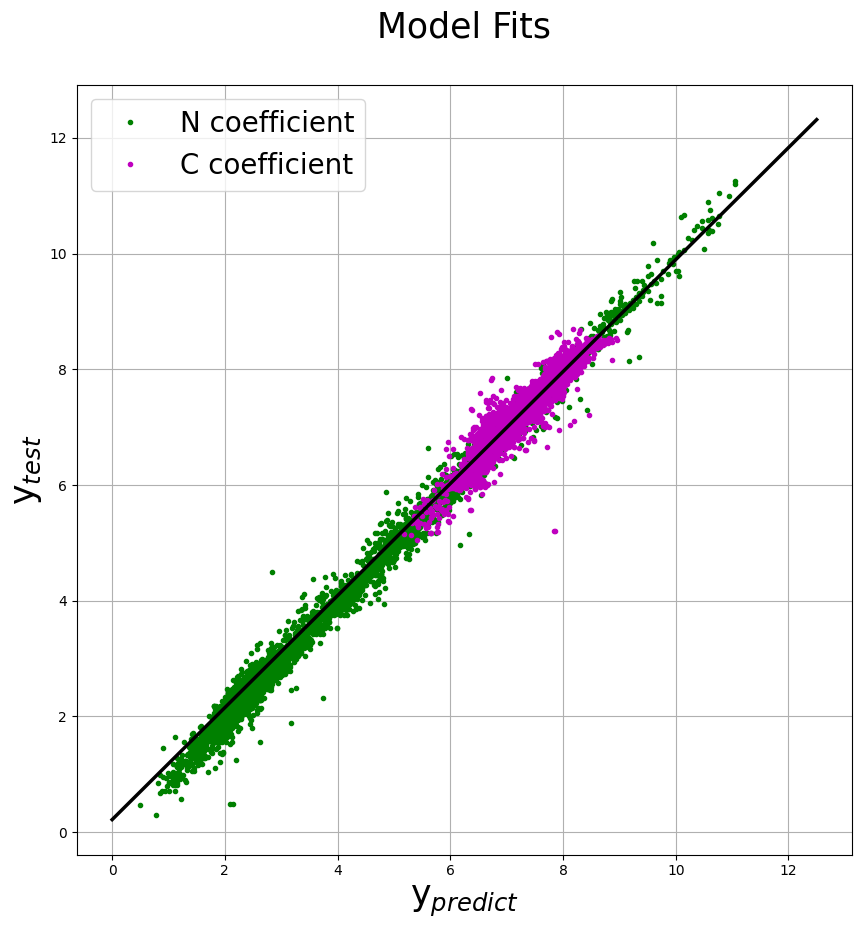

In [19]:
plt.figure(figsize=(10,10))
plt.title('Model Fits\n', fontsize=25)
plt.xlabel('y$_{predict}$', fontsize=25)
plt.ylabel('y$_{test}$', fontsize=25)
plt.grid(True)
plt.plot(y_pred_ann5[:,1],y_test5[:,1], 'g.', lw=2.5,label='N coefficient')
plt.plot(y_pred_ann5[:,0],y_test5[:,0], 'm.', lw=2.5,label='C coefficient')
y_pred_ann_tot = np.append(y_pred_ann5[:,1], y_pred_ann5[:,0])
y_test_ann_tot = np.append(y_test5[:,1], y_test5[:,0])
y_pred_ann_tot =y_pred_ann5[:,0]
y_test_ann_tot = y_test5[:,0]
# Plot regression line
b, a = np.polyfit(y_pred_ann_tot,y_test_ann_tot, deg=1)
# Create sequence of 100 numbers from 0 to 100
xseq = np.linspace(0, 12.5, num=100)
plt.plot(xseq, a + b * xseq, color="k", lw=2.5);

plt.legend(fontsize=20)
plt.show()